In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/iris_dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


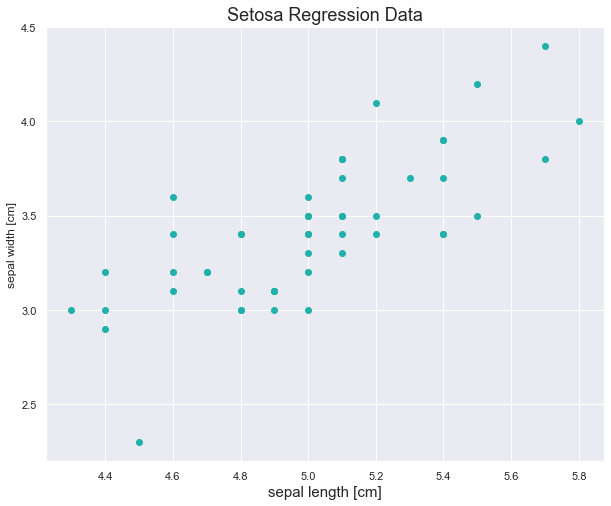

In [53]:
X = df.sepal_length.iloc[:50].values
y = df.sepal_width.iloc[:50].values

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]")
plt.title("Setosa Regression Data", fontsize = 18)
plt.show()


In [33]:
class SingleNeuron(object):
    def __init__(self, activation_function = "linear"):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.alpha = alpha
        self.epochs = epochs
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                y_difference = (self.predict(xi) - target)
                
                update = self.alpha * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += .5*((self.predict(xi) - target)**2)
            if errors < 1:
                return self
            else:
                self.errors_.append(errors)

        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        if self.activation_function == "linear":
            return preactivation
        elif self.activation_function == "sign":
            post_activation = np.where(preactivation >= 0.0, 1, -1)
            return post_activation
        else:
            return "NO ACTIVATION FUNCTION FOUND"


    

In [45]:
node = SingleNeuron()
node.train(X.reshape(-1, 1), y, alpha = .0001, epochs = 15)

In [13]:
w = np.random.rand(2)
X.reshape(-1, 1) @ w[:-1]

array([2.99533564, 2.8778715 , 2.76040735, 2.70167528, 2.93660357,
       3.17153185, 2.70167528, 2.93660357, 2.58421114, 2.8778715 ,
       3.17153185, 2.81913942, 2.81913942, 2.52547907, 3.40646014,
       3.34772807, 3.17153185, 2.99533564, 3.34772807, 2.99533564,
       3.17153185, 2.99533564, 2.70167528, 2.99533564, 2.81913942,
       2.93660357, 2.93660357, 3.05406771, 3.05406771, 2.76040735,
       2.81913942, 3.17153185, 3.05406771, 3.23026392, 2.8778715 ,
       2.93660357, 3.23026392, 2.8778715 , 2.58421114, 2.99533564,
       2.93660357, 2.64294321, 2.58421114, 2.93660357, 2.99533564,
       2.81913942, 2.99533564, 2.70167528, 3.11279978, 2.93660357])

In [7]:
X_test = X.reshape(-1, 1)
X_test.shape

(50, 1)

In [12]:
w[:-1].shape

(1,)

In [ ]:
node.predict()

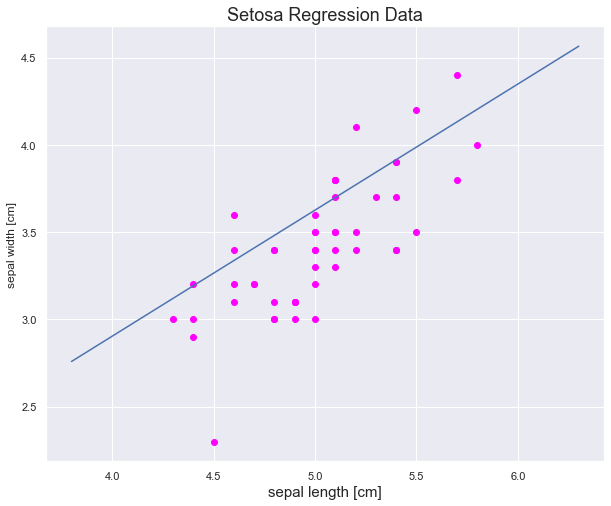

In [46]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "magenta")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]")
plt.title("Setosa Regression Data", fontsize = 18)
plt.show()

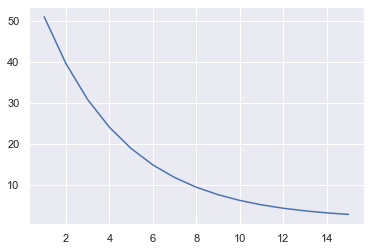

In [47]:
plt.plot(range(1, len(node.errors_) + 1), node.errors_)

In [48]:
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values

node = SingleNeuron(activation_function="sign")
node.train(X, y, alpha = .0001, epochs = 15)

In [50]:
node.predict(X) == y

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

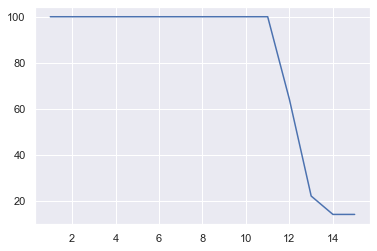

In [51]:
plt.plot(range(1, len(node.errors_) + 1), node.errors_)